# 机器学习作业四
- 姓名：艾明旭
- 学号：2111033
- 专业：信息安全

## 实验要求
截止日期：11月17日
以学号+姓名(4)的命名形式打包实验代码+实验报告，发送到邮箱2120230658@mail.nankai.edu.cn
#### 数据集
Most Popular Data Set中的wine数据集（对意大利同一地区声场的三种不同品种的酒做大量分析所得出的数据）
#### 基本要求
采用分层采样的方式将数据集划分为训练集和测试集。 
给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。
#### 中级要求：使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。
#### 高级要求：在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。
#### 拓展要求：浅谈ROC曲线和AUC值作为分类评价的合理性。

In [69]:
import math
import numpy as np  
import pandas as pd
import random
import csv
import operator
import matplotlib.pyplot as plt

导入相应的包

In [70]:
f = open('D:\dasanshang\jiqixuexi\P4\wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
means = [[],[],[]]                      #每一类的均值
std = [[],[],[]]                        #每一类的标准差

对测试集，训练集进行初始化，并且进行了means,std等向量的初始化。

In [71]:
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
#14为每列的数据个数，如果不是14，就认为读错了不读
    for t in range(len(myline)):
        if t != 0:
            myline[t] = float(myline[t])
        else:
            myline[t] = int(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)
test_len = [round(len(types[i]) / 5) for i in range(3)] # 按照4:1的方式划分测试集和训练集，之后可以进行更改
data_num = sum([len(types[i]) for i in range(3)])

对每列的数据进行赋值，同样按照4：1的方式划分测试集和训练集，按照分成3类的方式将两个数据集合理的进行分类，得到合适的数据集。

In [72]:
print(types[0][1])

[13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0]


In [73]:
print(test_len)
print(data_num)

[12, 14, 10]
178


#### 进行分层采样

In [74]:
test_data[0] = random.sample(types[0], test_len[0])
test_data[1] = random.sample(types[1], test_len[1])
test_data[2] = random.sample(types[2], test_len[2])
train_data[0] = [i for i in types[0] if i not in test_data[0]]
train_data[1] = [i for i in types[1] if i not in test_data[1]]
train_data[2] = [i for i in types[2] if i not in test_data[2]]

In [75]:
print(test_data[1])
print(train_data[2])

[[13.34, 0.94, 2.36, 17.0, 110.0, 2.53, 1.3, 0.55, 0.42, 3.17, 1.02, 1.93, 750.0], [12.6, 1.34, 1.9, 18.5, 88.0, 1.45, 1.36, 0.29, 1.35, 2.45, 1.04, 2.77, 562.0], [12.37, 1.17, 1.92, 19.6, 78.0, 2.11, 2.0, 0.27, 1.04, 4.68, 1.12, 3.48, 510.0], [12.72, 1.81, 2.2, 18.8, 86.0, 2.2, 2.53, 0.26, 1.77, 3.9, 1.16, 3.14, 714.0], [13.03, 0.9, 1.71, 16.0, 86.0, 1.95, 2.03, 0.24, 1.46, 4.6, 1.19, 2.48, 392.0], [12.21, 1.19, 1.75, 16.8, 151.0, 1.85, 1.28, 0.14, 2.5, 2.85, 1.28, 3.07, 718.0], [12.29, 2.83, 2.22, 18.0, 88.0, 2.45, 2.25, 0.25, 1.99, 2.15, 1.15, 3.3, 290.0], [12.37, 1.07, 2.1, 18.5, 88.0, 3.52, 3.75, 0.24, 1.95, 4.5, 1.04, 2.77, 660.0], [12.22, 1.29, 1.94, 19.0, 92.0, 2.36, 2.04, 0.39, 2.08, 2.7, 0.86, 3.02, 312.0], [12.72, 1.75, 2.28, 22.5, 84.0, 1.38, 1.76, 0.48, 1.63, 3.3, 0.88, 2.42, 488.0], [11.87, 4.31, 2.39, 21.0, 82.0, 2.86, 3.03, 0.21, 2.91, 2.8, 0.75, 3.64, 380.0], [12.08, 1.13, 2.51, 24.0, 78.0, 2.0, 1.58, 0.4, 1.4, 2.2, 1.31, 2.72, 630.0], [11.84, 0.89, 2.58, 18.0, 94.0, 2

In [76]:
print(np.mean(train_data[1], axis = 0))

[1.22428070e+01 2.01736842e+00 2.26859649e+00 2.05052632e+01
 9.48245614e+01 2.28807018e+00 2.09824561e+00 3.77368421e-01
 1.60421053e+00 3.04824561e+00 1.06140351e+00 2.77403509e+00
 5.10333333e+02]


#### 进行贝叶斯预测的操作，可以将算法经过一定的处理得到更加准确的结果
贝叶斯公式：给出了从先验概率计算后验概率的方法。
                                                    

P(c|x)：后验概率（在给定样本x的条件下，属于类别c的概率）。
P(x|c)：假设在c类下，观察到样本x的概率。模式特征𝑥的似然函数（特征x来自于类别c的可能性）。
P(c)：样本为类别c的先验概率。在实际应用中，先验概率都是未知的，只能通过背景知识、训练数据等来估计这些概率。这也是贝叶斯方法的难处之一。
𝑃(𝑥)：归一化的证据因子(比例因子)。
NB是贝叶斯分类器较为实用的一种，为了减少计算量，朴素贝叶斯分类器假定：在给定目标值时，各个属性之间相互独立。那么，属性 x_1,x_2,⋯,x_D的联合概率等于每个单独属性概率的乘积。

c_MAP=argmax_c_k∈CP(x|c_k)P(c_k)

P(x│c_k)=∏_d=1^D▒P(x_d|c_k)

c_MAP=argmax_c_k∈C∏_d=1^D▒P(x_d|c_k)P(c_k)


In [77]:
means[0] = np.mean(train_data[0], axis = 0)
std[0] = np.std(train_data[0], axis = 0)

means[1] = np.mean(train_data[1], axis = 0)
std[1] = np.std(train_data[1], axis = 0)

means[2] = np.mean(train_data[2], axis = 0)
std[2] = np.std(train_data[2], axis = 0)

In [78]:
print(means[1])

[1.22428070e+01 2.01736842e+00 2.26859649e+00 2.05052632e+01
 9.48245614e+01 2.28807018e+00 2.09824561e+00 3.77368421e-01
 1.60421053e+00 3.04824561e+00 1.06140351e+00 2.77403509e+00
 5.10333333e+02]


In [79]:
print(len(test_data[2]))

10


In [80]:
train_len = len(train_data[0]) + len(train_data[1]) + len(train_data[2])
print(train_len)

142


In [81]:
# 方便后面计算相应的评价指标
true_type = []
pred_type = []

编写贝叶斯分类算法，这里的正例率和要求的数值是一个随数据集而确定的，利用均值和标准差，以及我们曾经使用过的LOG函数可以将操作变得比较方便，这里需要我们进行的操作就比较少了
优点：计算简单、有稳定的分类效率
缺点：
需要估计类别的先验概率，且先验概率很多时候取决于假设，假设的模型可以有很多种，因此在某些时候会由于假设的先验模型不准确导致预测效果不佳。（通过目标值在训练数据中的频率来估计）。
假设属性之间相互独立，这个假设在实际应用中往往是不成立的，在属性个数比较多或者属性之间相关性较大时，分类效果不好。而在属性相关性较小时，朴素贝叶斯性能最为良好；

In [82]:
def bayes_classificate():
    # 首先，分别计算训练集上三个类的均值和标准差
    # 已经在上面计算完成
    wrong_num = 0
    pre_roc = []
    w = 0
    for i in range(3):
        for t in test_data[i]:                  # 两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                # 由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                # temp = ...
                # 这里计算使用实验课上讲的取log
                fir = 0
                l = len(t)
                for w in range(0, l):
                    mid = 0
                    mid += np.log(1 / (math.sqrt(2 * math.pi) * std[j][w]))
                    mid -= 0.5 * (t[w] - means[j][w]) * (t[w] - means[j][w]) / (std[j][w] * std[j][w])
                    fir += mid
                    sec = math.log(len(train_data[j]) / train_len)
                temp = fir + sec
                
                my_type.append(temp)                        # 这里将所有score保存
                
            print(my_type)
            pre_type = my_type.index(max(my_type))          # 取分值最大的为预测类别
            
            pre_roc.append(my_type[pre_type])
            true_type.append(i)
            pred_type.append(pre_type)
            if pre_type != i:                               # 统计错误数
                wrong_num += 1
    return wrong_num, pre_roc

错误率可以进行输出从而可以进行检错的操作，这里需要我们进行的目标就可以方便的解决了，最终可以发现错误数有两个，证明正确率很高

In [83]:
wrong_num, pre_roc = bayes_classificate()
last_roc = []
for i in range(0, len(pre_roc)):
    mid = []
    mid.append(pre_roc[i])
    mid.append(i)
    mid.append(true_type[i])
    mid.append(pred_type[i])
    last_roc.append(mid)
print(wrong_num)
print(pre_roc)
print(last_roc)

[-12.97903667965747, -34.46422241427097, -73.84950015917543]
[-15.75947109856885, -51.025147190736114, -126.7915790866195]
[-12.924586122319957, -37.46347392536413, -93.5497667951129]
[-14.456271235772126, -50.89884761572782, -106.80313099022833]
[-32.99912945209581, -25.94311059754476, -80.44275699927897]
[-15.635610264310312, -34.974678918977204, -97.34724465450995]
[-19.974312549412726, -21.77427747961245, -62.99037660096246]
[-14.799186783833214, -30.522062509688137, -95.22333823817056]
[-15.936171827455656, -36.47765396124589, -71.7538165925924]
[-16.58472437080605, -37.11167659791532, -103.09072946172651]
[-19.763036261346276, -35.39172001221259, -72.43200088519868]
[-17.39855150905739, -22.996394017197822, -81.29818302501769]
[-43.900782932971794, -24.253333972499902, -29.952372496636603]
[-42.933406329656016, -18.023942189698587, -38.025413089547456]
[-35.31948222761951, -19.271902922162266, -63.50032627704956]
[-21.389466844183097, -17.316366598326976, -62.57625524190432]
[-36

In [84]:
print(true_type)
print(pred_type)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


计算混淆矩阵，这里先初始化为全0，之后对于每个相应的位置，在预测位进行判断之后改变混淆矩阵的值

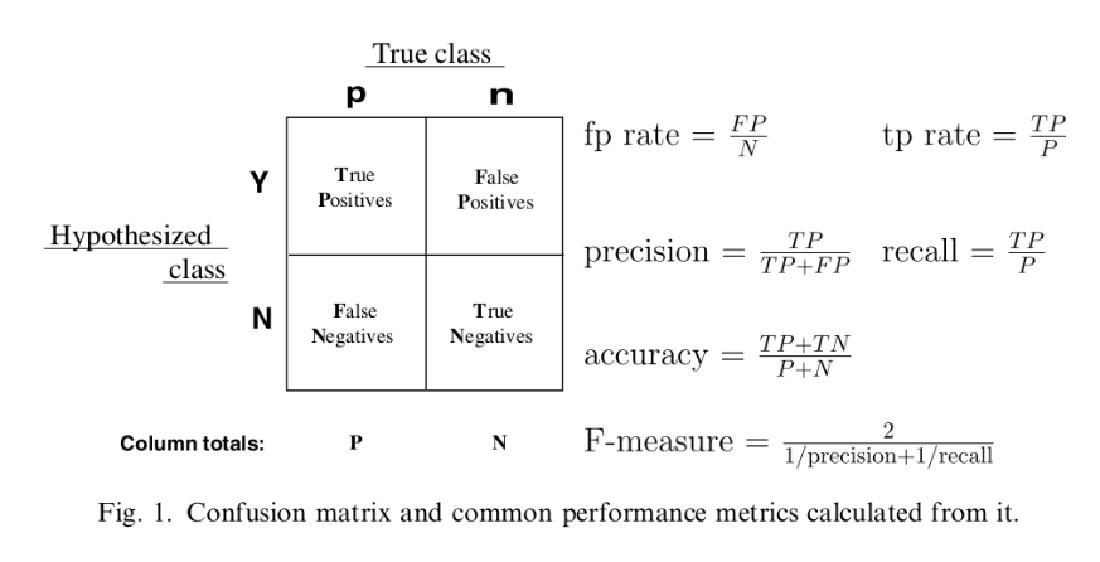

In [85]:
def confuse_maxtria(predict, fact):
    confuse = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    for i in range(len(predict)):
        confuse[fact[i] - 1][predict[i] - 1] += 1
    return confuse

In [86]:
print("混淆矩阵的计算结果是:\n", np.array(confuse_maxtria(pred_type, true_type)))
# 行是实际值，列是预测值

混淆矩阵的计算结果是:
 [[13  1  0]
 [ 0 10  0]
 [ 1  0 11]]


在feature函数当中，我们可以对特征值的要求进行计算，这里我们根据定义，可以很方便的计算出精度，召回率，F值等等操作

In [87]:
def feature(confuse_maxtria):
    for index in range(len(confuse_maxtria)):
        truth = confuse_maxtria[index][index]
        total = 0
        total2 = 0
        for i in range(len(confuse_maxtria)):
            total += confuse_maxtria[i][index]
        for i in range(len(confuse_maxtria)):
            total2 += confuse_maxtria[index][i]
        precision = truth / total
        recall = truth / total2
        f_rate = 2 * precision * recall / (precision + recall)
        print("类别", index + 1, "的精度为", precision, "，召回率的计算结果为", recall, "，F值为", f_rate)

In [88]:
feature(confuse_maxtria(pred_type, true_type))

类别 1 的精度为 0.9285714285714286 ，召回率的计算结果为 0.9285714285714286 ，F值为 0.9285714285714286
类别 2 的精度为 0.9090909090909091 ，召回率的计算结果为 1.0 ，F值为 0.9523809523809523
类别 3 的精度为 1.0 ，召回率的计算结果为 0.9166666666666666 ，F值为 0.9565217391304348


In [89]:
def roc_sort(roc):
    for i in range(1, len(roc)):
        for j in range(0, len(roc) - i):
            if roc[j+1][0] > roc[j ][0]:   #升序用>，降序用<
                roc[j], roc[j + 1] = roc[j + 1], roc[j]
    return roc

### ROC曲线的计算
AUC是与TPR和FPR密切相关的,而TPR和FPR分别从正例,负例的角度上去衡量了模型的分类能力(具有跟精准率和召回率一样的能在样本极端不平衡的情况下进行有效的衡量优势),因此在样本极端不平衡的情况下,AUC依然能够做出合理的评价.

In [90]:
# 为按照`temp`的值排序做好准备
# 四个值的意义
# pre_roc[i]：预测的temp值，为了排序
# i：序列号
# true_type[i]：其真实的类型
# pred_type[i]：其预测的类型
roc1 = roc_sort(last_roc[0:test_len[0]])
roc2 = roc_sort(last_roc[test_len[0]:(test_len[0] + test_len[1])])
roc3 = roc_sort(last_roc[(test_len[0] + test_len[1]):(test_len[0] + test_len[1] + test_len[2])])
# 按第一列谁最大排在第一位


print(roc1)
print(len(roc1))

print(roc2)
print(len(roc2))

print(roc3)
print(len(roc3))

[[-12.924586122319957, 2, 0, 0], [-12.97903667965747, 0, 0, 0], [-14.456271235772126, 3, 0, 0], [-14.799186783833214, 7, 0, 0], [-15.635610264310312, 5, 0, 0], [-15.75947109856885, 1, 0, 0], [-15.936171827455656, 8, 0, 0], [-16.58472437080605, 9, 0, 0], [-17.39855150905739, 11, 0, 0], [-19.763036261346276, 10, 0, 0], [-19.974312549412726, 6, 0, 0], [-25.94311059754476, 4, 0, 1]]
12
[[-16.973838655068544, 20, 1, 1], [-17.316366598326976, 15, 1, 1], [-17.67720189653593, 21, 1, 1], [-17.907938021935998, 23, 1, 1], [-17.916538169000784, 18, 1, 1], [-18.023942189698587, 13, 1, 1], [-18.52587708101262, 24, 1, 1], [-19.271902922162266, 14, 1, 1], [-21.251007207767064, 16, 1, 1], [-22.931457110137185, 25, 1, 2], [-23.159135008792727, 19, 1, 1], [-24.253333972499902, 12, 1, 1], [-25.355720052480006, 22, 1, 1], [-28.16936610015189, 17, 1, 1]]
14
[[-12.348239734093484, 35, 2, 2], [-15.558854378567018, 34, 2, 2], [-16.497840723620538, 29, 2, 2], [-16.903843047805772, 28, 2, 2], [-17.15562901753380

In [91]:
# 计算命中率TPR和假报率FPR
cm = confuse_maxtria(pred_type, true_type)
TPR = []
TNR = []
FPR = []
FNR = []
for index in range(len(cm)):   
    truth = cm[index][index]
    fir = 0
    sec_mot = np.sum(cm)
    sec_son = 0
    for i in range(len(cm)):
        fir += cm[index][i]
    for i in range(len(cm)):
        sec_son += cm[i][index]
    TPR.append(truth / fir)
    TNR.append(1-(sec_son-truth)/(sec_mot-fir-sec_son+truth))
    FPR.append((sec_son - truth) / (sec_mot - fir - sec_son + truth))
    FNR.append(1-truth/fir)
    print("类别", index + 1, "的TPR为", TPR[index], "TNR为", TNR[index],"FPR为", FPR[index],"FNR为",FNR[index])

类别 1 的TPR为 0.9285714285714286 TNR为 0.9523809523809523 FPR为 0.047619047619047616 FNR为 0.0714285714285714
类别 2 的TPR为 1.0 TNR为 0.96 FPR为 0.04 FNR为 0.0
类别 3 的TPR为 0.9166666666666666 TNR为 1.0 FPR为 0.0 FNR为 0.08333333333333337


这里我们可以计算出混淆矩阵的所有参数，并且运用其进行计算，尤其需要注意的是这里的TPR和FPR是我们对ROC曲线进行计算的必要参数，必须要计算。

In [92]:
TPRs0, TNRs0, FPRs0,FNRs0 = [], [],[],[]
right0 = 0
wrong0 = 0
lenSum0 = test_len[0]
TPRs0.append(0)
TNRs0.append(0)
FPRs0.append(0)
FNRs0.append(0)
for i in range(0, lenSum0):
    if roc1[i][2] == roc1[i][3]:
        right0 += 1
    else:
        wrong0 += 1
    TPRs0.append(right0 / lenSum0)
    TNRs0.append(1-wrong0/lenSum0)
    FPRs0.append(wrong0 / lenSum0)
    FNRs0.append(1-right0/lenSum0)
TPRs0.append(1)
TNRs0.append(1)
FPRs0.append(1)
FNRs0.append(1)
print(TPRs0)

[0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.4166666666666667, 0.5, 0.5833333333333334, 0.6666666666666666, 0.75, 0.8333333333333334, 0.9166666666666666, 0.9166666666666666, 1]


In [93]:
TPRs1, TNRs1,FPRs1,FNRs1 = [], [],[], []
right1 = 0
wrong1 = 0
lenSum1 = test_len[1]
TPRs1.append(0)
TNRs1.append(0)
FPRs1.append(0)
FNRs1.append(0)
for i in range(0, lenSum1):
    if roc2[i][2] == roc2[i][3]:
        right1 += 1
    else:
        wrong1 += 1
    TPRs1.append(right1 / lenSum1)
    TNRs1.append(1-wrong1 / lenSum1)
    FPRs1.append(wrong1 / lenSum1)
    FNRs1.append(1-right1 / lenSum1)
TPRs1.append(1)
TNRs1.append(1)
FPRs1.append(1)
FNRs1.append(1)
print(TNRs1)

[0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 1]


In [94]:
TPRs2, TNRs2,FPRs2,FNRs2 = [], [],[], []
right2 = 0
wrong2 = 0
lenSum2 = test_len[2]
TPRs2.append(0)
TNRs2.append(0)
FPRs2.append(0)
FNRs2.append(0)
for i in range(0, lenSum2):
    if roc2[i][2] == roc2[i][3]:
        right2 += 1
    else:
        wrong2 += 1
    TPRs2.append(right2 / lenSum2)
    TNRs2.append(1-wrong2 / lenSum2)
    FPRs2.append(wrong2 / lenSum2)
    FNRs2.append(1-right2 / lenSum2)
TPRs2.append(1)
TNRs2.append(1)
FPRs2.append(1)
FNRs2.append(1)
print(FNRs2)

[0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.30000000000000004, 0.19999999999999996, 0.09999999999999998, 0.09999999999999998, 1]


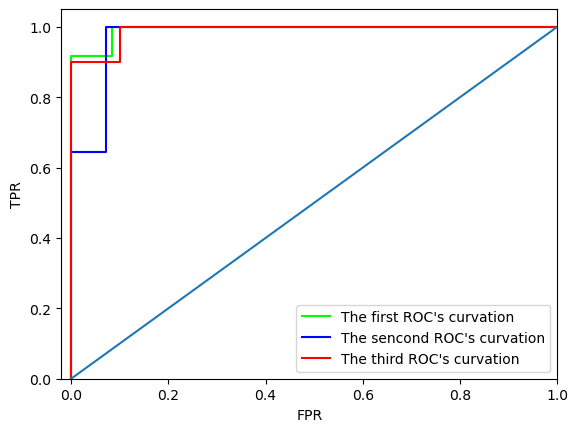

In [95]:
plt.step(FPRs0, TPRs0, label="The first ROC's curvation", color = '#00FF00')
plt.step(FPRs1, TPRs1, label="The sencond ROC's curvation", color = '#0000FF')
plt.step(FPRs2, TPRs2, label="The third ROC's curvation", color = '#FF0000')
plt.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.02, 1)
plt.ylim(0, 1.05)
plt.legend()
plt.show()

分别按要求计算出三组AUC的值，作为我们的所求

In [96]:
# 为曲线与FPR轴的面积
auc_area0 = 0
for i in range(1, len(TPRs0)):
    if FPRs0[i] != FPRs0[i - 1]:
        l0 = 0
        k0 = i
        # 计算横轴长度
        while(k0):
            if FPRs0[k0] != FPRs0[k0 - 1]:
                l0 += FPRs0[k0] - FPRs0[k0 - 1]
                k0 -= 1
            else:
                break
        auc_area0 += l0 * TPRs0[i] # 横轴乘纵轴
print("第一类的AUC值为：", auc_area0)

第一类的AUC值为： 1.0763888888888888


In [97]:
# 为曲线与FPR轴的面积
auc_area1 = 0
for i in range(1, len(TPRs1)):
    if FPRs1[i] != FPRs1[i - 1]:
        l1 = 0
        k1 = i
        # 计算横轴长度
        while(k1):
            if FPRs1[k1] != FPRs1[k1 - 1]:
                l1 += FPRs1[k1] - FPRs1[k1 - 1]
                k1 -= 1
            else:
                break
        auc_area1 += l1 * TPRs1[i] # 横轴乘纵轴
print("第二类的AUC值为：", auc_area1)

第二类的AUC值为： 0.9744897959183674


In [98]:
# 为曲线与FPR轴的面积
auc_area2 = 0
for i in range(1, len(TPRs2)):
    if FPRs2[i] != FPRs2[i - 1]:
        l2 = 0
        k2 = i
        # 计算横轴长度
        while(k2):
            if FPRs2[k2] != FPRs2[k2 - 1]:
                l2 += FPRs2[k2] - FPRs2[k2 - 1]
                k2 -= 1
            else:
                break
        auc_area2 += l2 * TPRs2[i] # 横轴乘纵轴
print("第三类的AUC值为：", auc_area2)

第三类的AUC值为： 1.09


## 拓展要求

ROC曲线（Receiver Operating Characteristic Curve）和AUC值（Area Under the Curve）常被用作分类模型的评价指标，以下是关于其合理性的分析：

对不平衡数据集的有效性：在处理不平衡数据集时，ROC曲线和AUC值是合理的评价指标。不平衡数据集指的是正负样本比例严重失衡的情况，如金融欺诈检测、罕见疾病诊断等。ROC曲线能够展示分类器在不同阈值下的真阳性率（TPR）和假阳性率（FPR），而AUC值则是ROC曲线下的面积，其反映了分类器对于不平衡类的真实性能。因此，ROC曲线和AUC值能够全面评估分类器在不平衡数据集上的分类能力。

鲁棒性：ROC曲线和AUC值对于不同的分类阈值和不同的分类器都能够提供鲁棒的评价，不会受到阈值选择的影响。ROC曲线以FPR为横轴，TPR为纵轴，可以展示出分类器在不同阈值下的分类性能。而AUC值则是对整个曲线下的面积进行求解，不受具体阈值的影响，因此能够客观地评估分类器的性能。

易于比较不同模型：由于ROC曲线和AUC值对于不同分类器都提供了相对公平的评价，因此它们能够用于比较不同模型的性能。通过对比不同模型的ROC曲线和AUC值，可以直观地判断分类器的优劣，选择最佳的分类模型。

然而需要注意的是，ROC曲线和AUC值也有一些局限性。它们只能评估二分类问题的性能，对于多类别问题需要进行适当的转换和处理。此外，ROC曲线和AUC值对于样本的排序和排名信息敏感，如果样本之间存在明显的重叠或交叉，则可能导致评估结果不准确。

综上所述，ROC曲线和AUC值作为分类评价的合理性主要体现在它们对于不平衡数据集的有效性、鲁棒性和比较不同模型的能力。但在使用时需要注意其适用范围和局限性，并结合具体问题和需求进行综合评估。

## 总结与展望

### 总结
- 本次是机器学习的第四次实验，完成实验的过程中对朴素贝叶斯分类器更加的了解，学习了很多的相关知识。
- 在本次实验中也了解了贝叶斯分类的原理
- 在本次实验中也知道了重新回顾了AUC值和ROC曲线的相关知识，我们可以将相应的内容在合适的框架内进行运行，这样我们的计算就能够用更加方便的方法。
- 最后也对手写机器学习算法更加的熟悉，体会到其与调用一些相关的库解决问题存在的相同和不同
- 最后我们比较了AUC值，ROC值的优缺点，也对我们使用其作为分类依据的场景和要求更多的理解